In [1]:
import numpy as np
import matplotlib.pyplot as plt
import batman
from astropy.io import fits

In [2]:
## Loading in the extracted HST data, from my 'HST Image Reduction' notebook
orbit1data = np.load('/home/mmmurphy/data/hd219666b/reduced_data/orbit1_extractednormalizedbroadbanddata.npz')
times_o1 = orbit1data['times']
flux_o1 = orbit1data['broadbandflux']
errs_o1 = orbit1data['broadbanderrs']
orbit2data = np.load('/home/mmmurphy/data/hd219666b/reduced_data/orbit2_extractednormalizedbroadbanddata.npz')
times_o2 = orbit2data['times']
flux_o2 = orbit2data['broadbandflux']
errs_o2 = orbit2data['broadbanderrs']
orbit3data = np.load('/home/mmmurphy/data/hd219666b/reduced_data/orbit3_extractednormalizedbroadbanddata.npz')
times_o3 = orbit3data['times']
flux_o3 = orbit3data['broadbandflux']
errs_o3 = orbit3data['broadbanderrs']
orbit4data = np.load('/home/mmmurphy/data/hd219666b/reduced_data/orbit4_extractednormalizedbroadbanddata.npz')
times_o4 = orbit4data['times']
flux_o4 = orbit4data['broadbandflux']
errs_o4 = orbit4data['broadbanderrs']

timesM = np.concatenate([times_o2, times_o3, times_o4])
fluxesM = np.concatenate([flux_o2, flux_o3, flux_o4])
errorsM = np.concatenate([errs_o2, errs_o3, errs_o4])

In [12]:
# loading in thomas'
tsdata = np.load('/home/mmmurphy/data/hd219666b/thomas_results/Transit_Broad_Visit3_NoFirst.npz')
timesT = tsdata['time']
rawfluxesT = tsdata['flux']
rawerrorsT = tsdata['error']
scandirsT = tsdata['scandir']

fluxesT = np.copy(rawfluxesT)
errorsT = np.copy(rawerrorsT)
sd1_idxs = np.where(scandirsT == 1.)[0]
sd0_idxs = np.where(scandirsT == 0.)[0]
    
    # if normalizing by max flux in second orbit:
#     orbit2_sd1 = rawfluxes[wav,:][sd1_idxs][:8]
#     orbit2_sd0 = rawfluxes[wav,:][sd0_idxs][:8]
#     normval1, normval0 = np.max(orbit2_sd1), np.max(orbit2_sd0)
    # if normalizing by median flux of whole visit
normval1 = np.median(rawfluxesT[sd1_idxs])
normval0 = np.median(rawfluxesT[sd0_idxs])
    
fluxesT[sd1_idxs] /= normval1
errorsT[sd1_idxs] /= normval1
fluxesT[sd0_idxs] /= normval0
errorsT[sd0_idxs] /= normval0

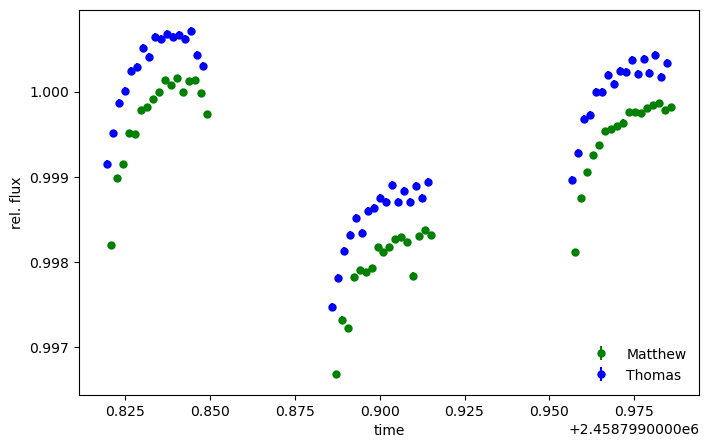

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
ax.errorbar(timesM, fluxesM, errorsM, ls='None', marker='o', c='green', ms=5, label='Matthew')
ax.errorbar(timesT, fluxesT, errorsT, ls='None', marker='o', c='blue', ms=5, label='Thomas')
ax.set_xlabel('time')
ax.set_ylabel('rel. flux')
ax.legend(loc='lower right', frameon=False, fontsize=10)
plt.show()